# Network Analysis in Python (Part 1)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
import warnings

jtplot.style(theme='chesterish')
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format='retina'

## Chapter 1. Introduction to networks

## 1. Introduction to networks

### Networks!

* Examples:
    * Social
    * Transportation
* Model relationships between entities

### Networks!

* Insights:
    * Important entities: influencers in social network
    * Pathfinding: most efficient transport path
    * Clustering: finding communities

### Network structure

<img src='Network_Analysis_in_Python_(Part_1)/Pictures/Network_structure.png' alt='Network structure' width=400 align='left'>

### NetworkX API basics

In [2]:
import networkx as nx

G = nx.Graph()
G.add_nodes_from([1, 2, 3])
G.nodes()

NodeView((1, 2, 3))

In [3]:
G.add_edge(1, 2)
G.edges() 

EdgeView([(1, 2)])

In [4]:
G.node[1]['label'] = 'blue'
G.nodes(data=True) 

NodeDataView({1: {'label': 'blue'}, 2: {}, 3: {}})

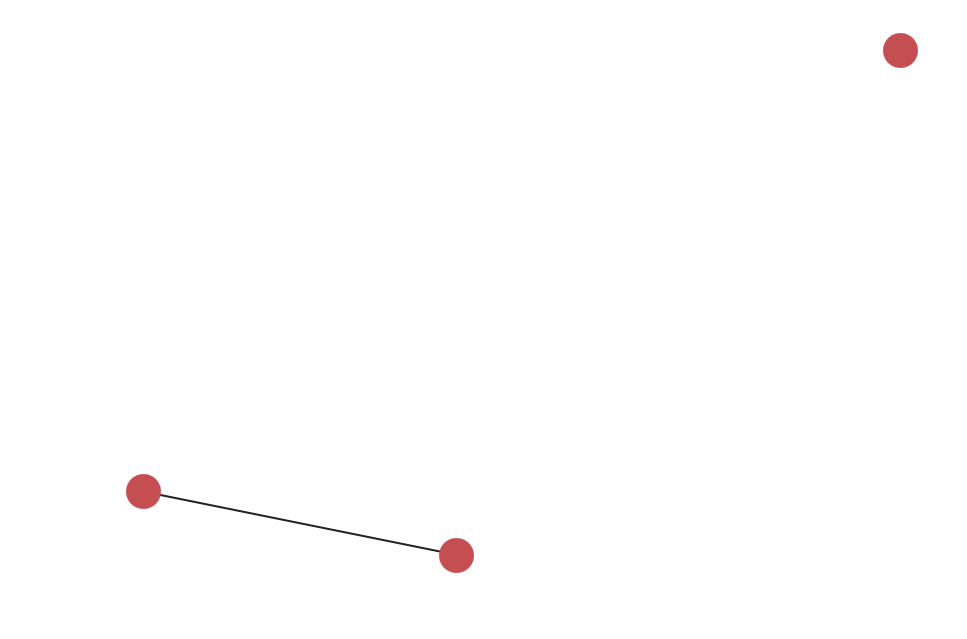

In [5]:
nx.draw(G)
plt.show()

### №1 What is a network?

Let's think again about examples of networks. Which of the following data is least easily modeled as a network?

* Airplane transportation
* *Phone numbers in a telephone directory*
* Co-authorship of papers.
* Atoms in a molecule

### №2 Basics of NetworkX API, using Twitter network

What is the size of the graph `T`, the type of `T.nodes()`, and the data structure of the third element of the last edge listed in `T.edges(data=True)`?

* *233369, `networkx.NodeView`, `dict`*
* 32369, `tuple`, `datetime`
* 23369, `networkx.NodeView`, `datetime`
* 22339, `dict`, `dict`

```python
In [1]: len(T)
Out[1]: 23369

In [2]: type(T.nodes())
Out[2]: networkx.classes.reportviews.NodeView

In [3]: list(T.edges(data=True))[-1]
Out[3]: (23324, 23336, {'date': datetime.date(2010, 9, 20)})
```

### №3 Basic drawing of a network using NetworkX

* Import `matplotlib.pyplot` as `plt` and `networkx` as `nx`
* Draw `T_sub` to the screen by using the `nx.draw()` function, and don't forget to also use `plt.show()` to display it

```python
import matplotlib.pyplot as plt
import networkx as nx

nx.draw(T_sub)
plt.show()
```

### №4 Queries on a graph

* Use a list comprehension to get a **list of nodes** from the graph `T` that have the `'occupation'` label of `'scientist'`
    * The output expression `n` has been specified for you, along with the iterator variables `n` and `d`. Your task is to fill in the iterable and the conditional expression
    * Use the `.nodes()` method of `T` access its nodes, and be sure to specify `data=True` to obtain the metadata for the nodes
    * The iterator variable `d` is a dictionary. The key of interest here is `'occupation'` and value of interest is `'scientist'`
* Use a list comprehension to get a **list of edges** from the graph `T` that were formed for at least 6 years, i.e., from before 1 Jan 2010
    * Your task once again is to fill in the iterable and conditional expression
    * Use the `.edges()` method of `T` to access its edges. Be sure to obtain the metadata for the edges as well
    * The dates are stored as `datetime.date` objects in the metadata dictionary `d`, under the key `'date'`. To access the date 1 Jan 2009, for example, the dictionary value would be `date(2009, 1, 1)`
    
```python
noi = [n for n, d in T.nodes(data=True) if d['occupation'] == 'scientist']

eoi = [(u, v) for u, v, d in T.edges(data=True) if d['date'] < date(2010,1,1)]
```

## 2. Types of graphs

### Undirected graphs

* Facebook social graph

<img src='Network_Analysis_in_Python_(Part_1)/Pictures/Undirected_graphs.png' alt='Undirected graphs' width=250 align='left'>

### Undirected graphs

In [6]:
G = nx.Graph()
type(G)

networkx.classes.graph.Graph

### Directed graphs

* Directed: Twitter social graph

<img src='Network_Analysis_in_Python_(Part_1)/Pictures/Directed_graphs.png' alt='Directed graphs' width=250 align='left'>

In [7]:
D = nx.DiGraph()
type(D)

networkx.classes.digraph.DiGraph

### Types of graphs

* Multi(Di)Graph: Trip records between bike sharing stations

<img src='Network_Analysis_in_Python_(Part_1)/Pictures/Types_of_graphs.png' alt='Types of graphs' width=250 align='left'>

### Multi-edge (Directed) graphs

In [8]:
M = nx.MultiGraph()
type(M)

networkx.classes.multigraph.MultiGraph

In [9]:
MD = nx.MultiDiGraph()
type(MD) 

networkx.classes.multidigraph.MultiDiGraph

### Weights on graphs

* Edges can contain weights

<img src='Network_Analysis_in_Python_(Part_1)/Pictures/Weights_on_graphs.png' alt='Weights on graphs' width=250 align='left'>

### Self-loops

* Nodes that are connected to themselves

<img src='Network_Analysis_in_Python_(Part_1)/Pictures/Self-loops.png' alt='Self-loops' width=250 align='left'>

### №5 Checking the un/directed status of a graph

* Undirected Graph
* *Directed Graph*
* Undirected Multi-Edge Graph
* Directed Multi-Edge Graph

```python
In [1]: type(T)
Out[1]: networkx.classes.digraph.DiGraph
```

### №6 Specifying a weight on edges

* Set the `'weight'` attribute of the edge between node `1` and `10` of `T` to be equal to `2`. Refer to the following template to set an attribute of an edge: `network_name.edges[node1, node2]['attribute'] = value`. Here, the `'attribute'` is `'weight'`
* Set the weight of every edge involving node `293` to be equal to `1.1`. To do this:
    * Using a `for` loop, iterate over all the edges of `T`, including the `metadata`
    * If `293` is involved in the list of nodes `[u, v]`:
        * Set the weight of the edge between `u` and `v` to be `1.1`

```python
T.edges[1, 10]['weight'] = 2

for u, v, d in T.edges(data=True):
    if 293 in [u, v]:
        T.edges[u, v]['weight'] = 1.1
```

### №7 Checking whether there are self-loops in the graph

* Define a function called `find_selfloop_nodes()` which takes one argument: `G`
* Using a `for` loop, iterate over all the edges in `G` (excluding the metadata)
    * If node `u` is equal to node `v`:
        * Append `u` to the list `nodes_in_selfloops`
        * Return the list `nodes_in_selfloops`
* Check that the number of self loops in the graph equals the number of nodes in self loops

```python
def find_selfloop_nodes(G):
    """
    Finds all nodes that have self-loops in the graph G.
    """
    nodes_in_selfloops = []
    for u, v in G.edges():
        if u == v:
            nodes_in_selfloops.append(u)
    return nodes_in_selfloops

assert T.number_of_selfloops() == len(find_selfloop_nodes(T))
```

## 3. Network visualization

### Irrational vs. Rational visualizations

<img src='Network_Analysis_in_Python_(Part_1)/Pictures/Irrational_vs_Rational_visualizations.png' alt='Irrational vs. Rational visualizations' width=400 align='left'>

### Visualizing networks

* Matrix plots
* Arc plots
* Circos plots

### Matrix plot

<img src='Network_Analysis_in_Python_(Part_1)/Pictures/Matrix_plot.png' alt='Matrix plot' width=400 align='left'>

### Directed matrices

<img src='Network_Analysis_in_Python_(Part_1)/Pictures/Directed_matrices.png' alt='Directed matrices' width=400 align='left'>

### Arc plot

<img src='Network_Analysis_in_Python_(Part_1)/Pictures/Arc_plot.png' alt='Arc plot' width=400 align='left'>

### Circos plot

<img src='Network_Analysis_in_Python_(Part_1)/Pictures/Circos_plot.png' alt='Circos plot' width=400 align='left'>

### nxviz API

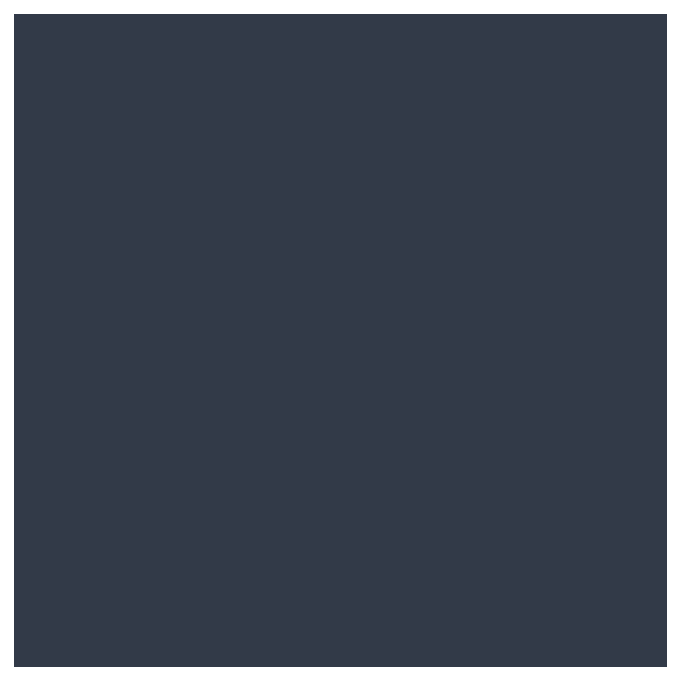

In [10]:
import nxviz as nv

ap = nv.ArcPlot(G)
ap.draw()
plt.show()

### №8 Visualizing using Matrix plots

* Import `nxviz` as `nv`
* Plot the graph `T` as a matrix plot. To do this:
    * Create the `MatrixPlot` object called `m` using the `nv.MatrixPlot()` function with `T` passed in as an argument
    * Draw the `m` to the screen using the `.draw()` method
    * Display the plot using `plt.show()`
* Convert the graph to a matrix format, and then convert the graph to back to the `NetworkX` form from the matrix as a directed graph
* Check that the `category` metadata field is lost from each node

```python
import nxviz as nv

m = nv.MatrixPlot(T)

m.draw()
plt.show()

A = nx.to_numpy_matrix(T)

T_conv = nx.from_numpy_matrix(A, create_using=nx.DiGraph())

for n, d in T_conv.nodes(data=True):
    assert 'category' not in d.keys()
```

### №9 Visualizing using Circos plots

* Import `CircosPlot` from `nxviz`
* Plot the Twitter network `T` as a Circos plot without any styling. Use the `CircosPlot()` function to do this. Don't forget to draw it to the screen using `.draw()` and then display it using `plt.show()`

```python
import matplotlib.pyplot as plt
from nxviz import CircosPlot

c = CircosPlot(T)

c.draw()
plt.show()
```

### №10 Visualizing using Arc plots

* Import `ArcPlot` from `nxviz`
* Create an un-customized `ArcPlot` of `T`. To do this, use the `ArcPlot()` function with just `T` as the argument
* Create another `ArcPlot` of `T` in which the nodes are ordered and colored by the `'category'` keyword. You'll have to specify the `node_order` and `node_color` parameters to do this. For both plots, be sure to draw them to the screen and display them with `plt.show()`

```python
import matplotlib.pyplot as plt
from nxviz import ArcPlot

a = ArcPlot(T)

a.draw()
plt.show()

a2 = ArcPlot(T, node_order='category', node_color='category')

a2.draw()
plt.show()
```

## Chapter 2. Important nodes

## 4. Degree centrality

### Important nodes

* Which nodes are important?
    * Degree centrality
    * Betweenness centrality

### Important nodes

* Which centre node might be more important?

<img src='Network_Analysis_in_Python_(Part_1)/Pictures/Important_nodes.png' alt='Important nodes' width=400 align='left'>

### Degree centrality

* Definition:
$$ \frac{\text{Number of Neighbours I Have}}{\text{Number of Neighbours I Could Possibly Have}} $$
* Examples of nodes with high degree centrality:
    * Twitter broadcasters
    * Airport transportation hubs
    * Disease super-spreaders

### Number of neighbors

```python
In [1]: G.edges()
Out[1]: [(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8),
(1, 9)]
    
In [2]: G.neighbors(1)
Out[2]: [2, 3, 4, 5, 6, 7, 8, 9]
    
In [3]: G.neighbors(8)
Out[3]: [1]
    
In [4]: G.neighbors(10)
……
NetworkXError: The node 10 is not in the graph.
```

### Degree centrality

```python
In [5]: nx.degree_centrality(G)
Out[5]:
{1: 1.0,
 2: 0.125,
 3: 0.125,
 4: 0.125,
 5: 0.125,
 6: 0.125,
 7: 0.125,
 8: 0.125,
 9: 0.125}
```

### №11 Compute number of neighbors for each node

* Write a function called `nodes_with_m_nbrs()` that has two parameters - `G` and `m` - and returns all nodes that have `m` neighbors. To do this:
    * Iterate over all nodes in `G` (not including the metadata)
    * Use the `len()` and `list()` functions together with the `.neighbors()` method to calculate the total number of neighbors that node `n` in graph `G` has
    * If the number of neighbors of node `n` is equal to `m`, add n to the set `nodes` using the `.add()` method
    * After iterating over all the nodes in `G`, return the set `nodes`
* Use your `nodes_with_m_nbrs()` function to retrieve all the nodes that have 6 neighbors in the graph `T`

```python
def nodes_with_m_nbrs(G, m):
    """
    Returns all nodes in graph G that have m neighbors.
    """
    nodes = set()

    for n in G.nodes():
        if len(list(G.neighbors(n))) == m:
            nodes.add(n)

    return nodes

six_nbrs = nodes_with_m_nbrs(T, 6)
print(six_nbrs)
```

### №12 Compute degree distribution

* Use a list comprehension along with the `.neighbors(n)` method to get the degree of every node. The result should be a list of integers
    * Use `n` as your iterator variable
    * The output expression of your list comprehension should be the number of neighbors that node `n` has - that is, its degree. Use the `len()` and `list()` functions together with the `.neighbors()` method to compute this
    * The iterable in your list comprehension is all the nodes in `T`, accessed using the `.nodes()` method
* Print the degrees

```python
degrees = [len(list(T.neighbors(n))) for n in T.nodes()]
print(degrees)

```

### №13 Degree centrality distribution

* Compute the degree centrality of the Twitter network `T`
* Using `plt.hist()`, plot a histogram of the degree centrality distribution of `T`. This can be accessed using `list(deg_cent.values())`
* Plot a histogram of the degree distribution `degrees` of `T`. This is the same list you computed in the last exercise
* Create a scatter plot with `degrees` on the x-axis and the degree centrality distribution `list(deg_cent.values())` on the y-axis

```python
import matplotlib.pyplot as plt

deg_cent = nx.degree_centrality(T)

plt.figure()
plt.hist(list(deg_cent.values()))
plt.show()

plt.figure()
plt.hist(degrees)
plt.show()

plt.figure()
plt.scatter(degrees, list(deg_cent.values()))
plt.show()
```

## 5. Graph algorithms

### Finding paths

* Pathfinding is important for
    * Optimization: e.g. shortest transport paths
    * Modeling: e.g. disease spread, information passing
* Algorithm: Breadth-first search

### Breadth-first search (BFS)

* Example: Shortest path between two nodes

<img src='Network_Analysis_in_Python_(Part_1)/Pictures/BFS.png' alt='BFS' align='left' width=400>

### Recall: Neighbors

```python
In [1]: G
Out[1]: <networkx.classes.graph.Graph at 0x10cc08828>
    
In [2]: len(G.edges())
Out[2]: 57
    
In [3]: len(G.nodes())
Out[3]: 20
    
In [4]: G.neighbors(1)
Out[4]: [10, 5, 14, 7]
    
In [5]: G.neighbors(10)
Out[5]: [1, 19, 5, 17, 8, 9, 13, 14]
```

### №14 Shortest Path I

* Create a function called `path_exists()` that has 3 parameters - `G`, `node1`, and `node2` - and returns whether or not a path exists between the two nodes
* Initialize the queue of nodes to visit with the first node, `node1`. `queue` should be a list
* Iterate over the nodes in `queue`
* Get the neighbors of the node using the `.neighbors()` method of the graph `G`
* Check to see if the destination node `node2` is in the set of `neighbors`. If it is, return `True`

```python
def path_exists(G, node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    visited_nodes = set()
    queue = [node1]

    for node in queue:
        neighbors = G.neighbors(node)
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
            break
```

### №15 Shortest Path II

* Using the `.add()` method, add the current node node to the set `visited_nodes` to keep track of what nodes have already been visited
* Add the neighbors of the current node node that have not yet been visited to `queue`. To do this, you'll need to use the `.extend()` method of `queue` together with a list comprehension. The `.extend()` method appends all the items in a given list
    * The output expression and iterator variable of the list comprehension are both `n`. The iterable is the list `neighbors`, and the conditional is if `n` is not in the visited nodes

```python
def path_exists(G, node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    visited_nodes = set()
    queue = [node1]

    for node in queue:
        neighbors = G.neighbors(node)
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
          
        else:
            visited_nodes.add(node)
            queue.extend([n for n in neighbors if n not in visited_nodes])
```

### №16 Shortest Path III

* Check to see if the queue has been emptied. You can do this by inspecting the last element of queue with `[-1]`
* Place the appropriate return statement for indicating whether there's a path between these two nodes

```python
def path_exists(G, node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    visited_nodes = set()
    queue = [node1]

    for node in queue:
        neighbors = G.neighbors(node)
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
            break
        else:
            visited_nodes.add(node)
            queue.extend([n for n in neighbors if n not in visited_nodes])

        if node == queue[-1]:
            print('Path does not exist between nodes {0} and {1}'.format(node1, node2))

            return False
```

## 6. Betweenness centrality

### All shortest paths

* Set of paths
* Each path is shortest path between a given pair of nodes
* Done for all node pairs

### Betweenness centrality

* Definition:
$$ \frac{\text{num. shortest paths through node}}{\text{all possible shortest paths}} $$
* Application:
    * Bridges between liberal- and conservativeleaning Twi!er users
    * Critical information transfer links

### Examples

* Singapore: Raffles Place & Jurong East

<img src='Network_Analysis_in_Python_(Part_1)/Pictures/Examples.png' alt='Singapore' width=400 align='left'>

### Example

* High betweenness centrality, low degree centrality?

<img src='Network_Analysis_in_Python_(Part_1)/Pictures/Example.png' alt='High betweenness centrality' width=400 align='left'>

### Betweenness centrality

In [11]:
import networkx as nx

G = nx.barbell_graph(m1=5, m2=1)
nx.betweenness_centrality(G)

{0: 0.0,
 1: 0.0,
 2: 0.0,
 3: 0.0,
 4: 0.5333333333333333,
 6: 0.5333333333333333,
 7: 0.0,
 8: 0.0,
 9: 0.0,
 10: 0.0,
 5: 0.5555555555555556}

### №17 NetworkX betweenness centrality on a social network

* Compute the betweenness centrality `bet_cen` of the nodes in the graph `T`
* Compute the degree centrality `deg_cen` of the nodes in the graph `T`
* Compare betweenness centrality to degree centrality by creating a scatterplot of the two, with `list(bet_cen.values())` on the x-axis and `list(deg_cen.values())` on the y-axis

```python
bet_cen = nx.betweenness_centrality(T)
deg_cen = nx.degree_centrality(T)

plt.scatter(list(bet_cen.values()), list(deg_cen.values()))
plt.show()
```

### №18 Deep dive - Twitter network

* Write a function `find_nodes_with_highest_deg_cent(G)` that returns the node(s) with the highest degree centrality using the following steps:
    * Compute the degree centrality of `G`
    * Compute the maximum degree centrality using the `max()` function on `list(deg_cent.values())`
    * Iterate over the degree centrality dictionary, `deg_cent.items()`
    * If the degree centrality value `v` of the current node `k` is equal to `max_dc`, add it to the set of nodes
* Use your function to find the node(s) that has the highest degree centrality in `T`
* Write an assertion statement that checks that the node(s) is/are correctly identified

```python
def find_nodes_with_highest_deg_cent(G):
    deg_cent = nx.degree_centrality(G)
    max_dc = max(list(deg_cent.values()))
    nodes = set()

    for k, v in deg_cent.items():
        if v == max_dc:
            nodes.add(k)

    return nodes

top_dc = find_nodes_with_highest_deg_cent(T)
print(top_dc)

for node in top_dc:
    assert nx.degree_centrality(T)[node] == max(nx.degree_centrality(T).values())
```

### №19 Deep dive - Twitter network part II

* Write a function `find_node_with_highest_bet_cent(G)` that returns the node(s) with the highest betweenness centrality
    * Compute the betweenness centrality of `G`
    * Compute the maximum betweenness centrality using the `max()` function on `list(bet_cent.values())`
    * Iterate over the degree centrality dictionary, `bet_cent.items()`
    * If the degree centrality value `v` of the current node `k` is equal to `max_bc`, add it to the set of nodes
* Use your function to find the node(s) that has the highest betweenness centrality in `T`
* Write an assertion statement that you've got the right node

```python
def find_node_with_highest_bet_cent(G):
    bet_cent = nx.betweenness_centrality(G)
    max_bc = max(bet_cent.values())
    nodes = set()

    for k, v in bet_cent.items():
        if v == max_bc:
            nodes.add(k)

    return nodes

top_bc = find_node_with_highest_bet_cent(T)

for node in top_bc:
    assert nx.betweenness_centrality(T)[node] == max(nx.betweenness_centrality(T).values())
```

## Chapter 3. Structures

## 7. Cliques & communities

### Cliques

* Social cliques: tightly-knit groups
* Network cliques: completely connected graphs

<img src='Network_Analysis_in_Python_(Part_1)/Pictures/Cliques.png' alt='Cliques' width=200 align='left'>

### Cliques

* Simplest complex clique: a triangle

<img src='Network_Analysis_in_Python_(Part_1)/Pictures/triangle.png' alt='Cliques' width=200 align='left'>

### Triangle applications

* Friend recommendation systems

<img src='Network_Analysis_in_Python_(Part_1)/Pictures/Triangle_applications.png' alt='Triangle applications' width=200 align='left'>

### Clique code

```python
In [1]: G
Out[1]: <networkx.classes.graph.Graph at 0x10c99ecf8>
    
In [2]: from itertools import combinations
    
In [3]: for n1, n2 in combinations(G.nodes(), 2):
            print(n1, n2)
            
0 1
0 2
0 3
0 4
0 5
...
...
```

### №20 Identifying triangle relationships

* Import `combinations` from `itertools`
* Write a function `is_in_triangle()` that has two parameters - `G` and `n` - and checks whether a given node is in a triangle relationship or not
* `combinations(iterable, n)` returns combinations of size `n` from iterable. This will be useful here, as you want combinations of size `2` from `G.neighbors(n)`
* To check whether an edge exists between two nodes, use the `.has_edge(node1, node2)` method. If an edge exists, then the given node is in a triangle relationship, and you should return `True`

```python
from itertools import combinations

def is_in_triangle(G, n):
    """
    Checks whether a node `n` in graph `G` is in a triangle relationship or not.
    Returns a boolean.
    """
    in_triangle = False

    for n1, n2 in combinations(G.neighbors(n), 2):
        if G.has_edge(n1, n2):
            in_triangle = True
            break
    return in_triangle
```

### №21 Finding nodes involved in triangles

* Write a function `nodes_in_triangle()` that has two parameters - `G` and `n` - and identifies all nodes in a triangle relationship with a given node
    * In the `for` loop, iterate over all possible triangle relationship combinations
    * Check whether the nodes `n1` and `n2` have an edge between them. If they do, add both nodes to the set `triangle_nodes`
* Use your function in an `assert` statement to check that the number of nodes involved in a triangle relationship with node `1` of graph `T` is equal to `35`

```python
from itertools import combinations

def nodes_in_triangle(G, n):
    """
    Returns the nodes in a graph `G` that are involved in a triangle relationship with the node `n`.
    """
    triangle_nodes = set([n])

    for n1, n2 in combinations(G.neighbors(n), 2):
        if G.has_edge(n1, n2):
            triangle_nodes.add(n1)
            triangle_nodes.add(n2)

    return triangle_nodes

assert len(nodes_in_triangle(T, 1)) == 35
```

### №22 Finding open triangles

* Write a function `node_in_open_triangle()` that has two parameters - `G` and `n` - and identifies whether a node is present in an open triangle with its neighbors
    * In the `for` loop, iterate over all possible triangle relationship combinations
    * If the nodes `n1` and `n2` do not have an edge between them, set `in_open_triangle` to `True`, break out from the if statement and return `in_open_triangle`
* Use this function to count the number of open triangles that exist in `T`
    * In the `for` loop, iterate over all the nodes in `T`
    * If the current node `n` is in an open triangle, increment `num_open_triangles`
    
```python
from itertools import combinations

def node_in_open_triangle(G, n):
    """
    Checks whether pairs of neighbors of node `n` in graph `G` are in an 'open triangle' relationship with node `n`.
    """
    in_open_triangle = False

    for n1, n2 in combinations(G.neighbors(n), 2):
        if not G.has_edge(n1, n2):
            in_open_triangle = True
            break

    return in_open_triangle

num_open_triangles = 0

for n in T.nodes():
    if node_in_open_triangle(T, n):
        num_open_triangles += 1

print(num_open_triangles)
```

## 8. Maximal cliques

### Maximal cliques

* Definition: a clique that, when extended by one node is no longer a clique

<img src='Network_Analysis_in_Python_(Part_1)/Pictures/Maximal_cliques.png' alt='Maximal cliques' width=200 align='left'>

* Applications: community finding

<img src='Network_Analysis_in_Python_(Part_1)/Pictures/Maximal_cliques2.png' alt='Maximal cliques' width=200 align='left'>

### Communities

* Find cliques
* Find unions of cliques

### NetworkX API

* find_cliques finds all maximal cliques

### Maximal cliques

In [12]:
import networkx as nx

G = nx.barbell_graph(m1=5, m2=1)
nx.find_cliques(G)

<generator object find_cliques at 0x1a1c4e5cf0>

In [13]:
list(nx.find_cliques(G))

[[4, 0, 1, 2, 3], [4, 5], [6, 5], [6, 7, 8, 9, 10]]

<img src='Network_Analysis_in_Python_(Part_1)/Pictures/Maximal_cliques3.png' alt='Maximal cliques' width=700 align='left'>

### №23 Finding all maximal cliques of size 'n'

* Write a function maximal_cliques() that has two parameters - `G` and `size` - and finds all maximal cliques of size `n`
    * In the `for` loop, iterate over all the cliques in `G` using the `nx.find_cliques()` function
    * If the current clique is of size size, append it to the list `mcs`
* Use an assert statement and your `maximal_cliques()` function to check that there are `33` maximal cliques of size `3` in the graph `T`

```python
def maximal_cliques(G, size):
    """
    Finds all maximal cliques in graph `G` that are of size `size`.
    """
    mcs = []
    for clique in nx.find_cliques(G):
        if len(clique) == size:
            mcs.append(clique)
    return mcs

assert len(maximal_cliques(T, 3)) == 33
```

## 9. Subgraphs

### Subgraphs

* Visualize portions of a large graph
    * Paths
    * Communities/cliques
    * Degrees of separation from a node

### Subgraphs

```python
In [1]: import networkx as nx
    
In [2]: G = nx.erdos_renyi_graph(n=20, p=0.2)
    
In [3]: G.nodes()
Out[3]: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
    
In [4]: nodes = G.neighbors(8)
    
In [5]: nodes
Out[5]: [2, 3, 4, 10]
    
In [6]: nodes.append(8)
    
In [7]: G_eight = G.subgraph(nodes)
    
In [8]: G_eight.edges()
Out[8]: [(8, 2), (8, 3), (8, 4), (8, 10), (2, 10)]
    
In [9]: G_eight
Out[9]: <networkx.classes.graph.Graph at 0x10cae39e8>
    
In [10]: G
Out[10]: <networkx.classes.graph.Graph at 0x10cad1f60>
    
In [11]: nx.draw(G_eight, with_labels=True)
```

<img src='Network_Analysis_in_Python_(Part_1)/Pictures/Subgraphs.png' alt='Subgraphs' width=300 align='left'>

### №24 Subgraphs I

* Write a function `get_nodes_and_nbrs(G, nodes_of_interest)` that extracts the subgraph from graph `G` comprised of the `nodes_of_interest` and their neighbors
    * In the first `for` loop, iterate over `nodes_of_interest` and append the current node `n` to `nodes_to_draw`
    * In the second `for` loop, iterate over the neighbors of `n`, and append all the neighbors `nbr` to `nodes_to_draw`
* Use the function to extract the subgraph from `T` comprised of nodes 29, 38, and 42 (contained in the pre-defined list `nodes_of_interest`) and their neighbors. Save the result as `T_draw`
* Draw the subgraph `T_draw` to the screen

```python
nodes_of_interest = [29, 38, 42]

def get_nodes_and_nbrs(G, nodes_of_interest):
    """
    Returns a subgraph of the graph `G` with only the `nodes_of_interest` and their neighbors.
    """
    nodes_to_draw = []

    for n in nodes_of_interest:
        nodes_to_draw.append(n)

        for nbr in G.neighbors(n):
            nodes_to_draw.append(nbr)

    return G.subgraph(nodes_to_draw)

T_draw = get_nodes_and_nbrs(T, nodes_of_interest)

nx.draw(T_draw)
plt.show()
```

### №25 Subgraphs II

* Using a list comprehension, extract nodes that have the metadata `'occupation'` as `'celebrity'` alongside their neighbors:
    * The output expression of the list comprehension is `n`, and there are two iterator variables: `n` and `d`. The iterable is the list of nodes of `T` (including the metadata, which you can specify using `data=True`) and the conditional expression is if the `'occupation'` key of the metadata dictionary `d` equals `'celebrity'`
* Place them in a new subgraph called `T_sub`. To do this:
    * Iterate over the nodes, compute the neighbors of each node, and add them to the set of nodes `nodeset` by using the `.union()` method
    * Use nodeset along with the `T.subgraph()` method to calculate `T_sub`
* Draw `T_sub` to the screen

```python
nodes = [n for n, d in T.nodes(data=True) if d['occupation'] == 'celebrity']
nodeset = set(nodes)

for n in nodes:
    nbrs = T.neighbors(n)
    nodeset = nodeset.union(nbrs)

T_sub = T.subgraph(nodeset)

nx.draw(T_sub)
plt.show()
```

## Chapter 4. Bringing it all together

## 10. Case study!

### Data

* Github user collaboration network
* Nodes: users
* Edges: collaboration on same GitHub repository
* Goals:
    * Analyze structure
    * Visualize
    * Build simple recommendation system

### Graph properties

In [14]:
import networkx as nx

G = nx.erdos_renyi_graph(n=20, p=0.2)
len(G.edges())

33

In [15]:
len(G.nodes())

20

In [16]:
nx.degree_centrality(G)

{0: 0.15789473684210525,
 1: 0.2631578947368421,
 2: 0.21052631578947367,
 3: 0.2631578947368421,
 4: 0.05263157894736842,
 5: 0.10526315789473684,
 6: 0.3684210526315789,
 7: 0.3157894736842105,
 8: 0.10526315789473684,
 9: 0.10526315789473684,
 10: 0.05263157894736842,
 11: 0.2631578947368421,
 12: 0.21052631578947367,
 13: 0.21052631578947367,
 14: 0.10526315789473684,
 15: 0.21052631578947367,
 16: 0.10526315789473684,
 17: 0.10526315789473684,
 18: 0.21052631578947367,
 19: 0.05263157894736842}

In [17]:
nx.betweenness_centrality(G)

{0: 0.06172839506172838,
 1: 0.1596166341780377,
 2: 0.04048083170890189,
 3: 0.14165042235217676,
 4: 0.0,
 5: 0.0142949967511371,
 6: 0.3708252111760883,
 7: 0.20337881741390512,
 8: 0.0142949967511371,
 9: 0.0,
 10: 0.0,
 11: 0.17384665367121505,
 12: 0.08983105912930474,
 13: 0.07248213125406107,
 14: 0.0071474983755685515,
 15: 0.04463937621832358,
 16: 0.0,
 17: 0.10526315789473684,
 18: 0.0677712800519818,
 19: 0.0}

### Data

* Number of nodes
* Number of edges
* Degree centrality distribution
* Betweenness centrality distribution

### №26 Characterizing the network (I)

Your job in this exercise is to identify how many nodes and edges are present in the network. You can use the functions `len(G.nodes())` and `len(G.edges())` to calculate the number of nodes and edges respectively

* 72900 nodes, 56519 edges
* *56519 nodes, 72900 edges*
* 47095 nodes, 65789 edges
* 63762 nodes, 71318 edges

### №27 Characterizing the network (II)

* Plot the degree distribution of the GitHub collaboration network `G`. Recall that there are four steps involved here:
    * Calculating the degree centrality of `G`
    * Using the `.values()` method of `G` and converting it into a list
    * Passing the list of degree distributions to `plt.hist()`
    * Displaying the histogram with `plt.show()`
    
```python
import matplotlib.pyplot as plt
import networkx as nx

plt.hist(list(nx.degree_centrality(G).values()))
plt.show()
```

### №28 Characterizing the network (III)

* Plot the betweenness centrality distribution of the GitHub collaboration network. You have to follow exactly the same four steps as in the previous exercise, substituting `nx.betweenness_centrality()` in place of `nx.degree_centrality()`

```python
import matplotlib.pyplot as plt
import networkx as nx

plt.hist(list(nx.betweenness_centrality(G).values()))
plt.show()
```

## 11. Case study part II: Visualization

### nxviz API

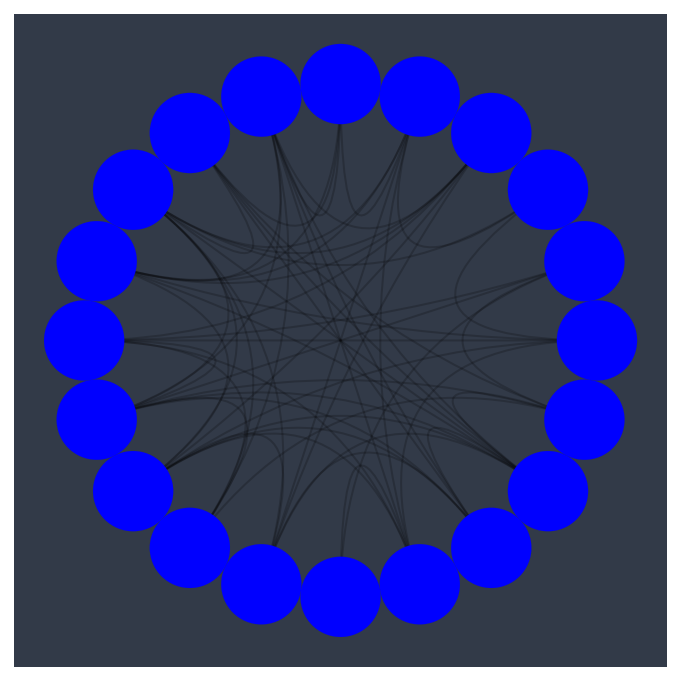

In [18]:
import networkx as nx
import nxviz as nv

G = nx.erdos_renyi_graph(n=20, p=0.3)

circ = nv.CircosPlot(G)
circ.draw()

### NetworkX API

In [19]:
import networkx as nx

G = nx.erdos_renyi_graph(n=100, p=0.03)
nx.connected_component_subgraphs(G)

<generator object connected_component_subgraphs at 0x1a1c76aa98>

In [20]:
list(nx.connected_component_subgraphs(G))

In [21]:
for g in list(nx.connected_component_subgraphs(G)):
    print(len(g.nodes()))

96
1
1
1
1


### №29 MatrixPlot

* Make a MatrixPlot visualization of the largest connected component subgraph, with authors grouped by their user group number
    * First, calculate the largest connected component subgraph by using the `nx.connected_component_subgraphs(G)` inside the provided `sorted()` function. Python's built-in `sorted()` function takes an iterable and returns a sorted list (in ascending order, by default). Therefore, to access the largest connected component subgraph, the statement is sliced with `[-1]`
    * Create the `MatrixPlot` object `h`. You have to specify the parameters `graph` and `node_grouping` to be the largest connected component subgraph and `'grouping'`, respectively
    * Draw the `MatrixPlot` object to the screen and display the plot
    
```python
from nxviz import MatrixPlot
import matplotlib.pyplot as plt

largest_ccs = sorted(nx.connected_component_subgraphs(G), key=lambda x: len(x))[-1]

h = MatrixPlot(graph=largest_ccs, node_grouping='grouping')

h.draw()
plt.show()
```

### №30 ArcPlot

* Make an ArcPlot of the GitHub collaboration network, with authors sorted by degree. To do this:
    * Iterate over all the nodes in `G`, including the metadata (by specifying `data=True`).
    * In each iteration of the loop, calculate the degree of each node `n` with `nx.degree()` and set its `'degree'` attribute. `nx.degree()` accepts two arguments: `A` graph and `a` node
    * Create the `ArcPlot` object a by specifying two parameters: the `graph`, which is `G`, and the `node_order`, which is `'degree'`, so that the nodes are sorted
    * Draw the `ArcPlot` object to the screen

```python
from nxviz.plots import ArcPlot
import matplotlib.pyplot as plt

for n, d in G.nodes(data=True):
    G.node[n]['degree'] = nx.degree(G, n)

a = ArcPlot(graph=G, node_order='degree')

a.draw()
plt.show()
```

### №31 CircosPlot

* Make a CircosPlot of the network, again, with GitHub users sorted by their degree, and grouped and coloured by their `'grouping'` key. To do this:
    * Iterate over all the nodes in `G`, including the metadata (by specifying `data=True`)
    * In each iteration of the loop, calculate the degree of each node `n` with `nx.degree()` and set its `'degree'` attribute
    * Create the `CircosPlot` object `c` by specifying three parameters in addition to the graph `G`: the `node_order`, which is `'degree'`, the `node_grouping` and the `node_color`, which are both `'grouping'`
    * Draw the `CircosPlot` object to the screen

```python
from nxviz import CircosPlot
import matplotlib.pyplot as plt

for n, d in G.nodes(data=True):
    G.node[n]['degree'] = nx.degree(G, n)

c = CircosPlot(G, node_order='degree', node_grouping='grouping', node_color='grouping')

c.draw()
plt.show()
```

## 13. Case study part III: Cliques

### Cliques

* Definition:
    * Groups of nodes
    * Fully connected
* Simplest clique: edge
* Simplest complex clique: triangle

### Maximal cliques

* Definition:
    * A clique
    * Cannot be extended by adding a node

### Finding cliques

In [22]:
import networkx as nx

G = nx.erdos_renyi_graph(n=100, p=0.15)
nx.find_cliques(G)

<generator object find_cliques at 0x1a1c76ad68>

In [23]:
for clique in nx.find_cliques(G):
    print(len(clique))

3
3
3
3
3
3
3
3
3
3
2
2
3
3
3
2
3
3
3
3
3
3
3
3
3
2
3
3
3
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
2
3
3
3
2
3
3
3
5
3
3
4
3
3
3
3
3
4
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
3
3
3
3
3
2
2
3
4
3
3
2
3
3
3
3
3
3
3
3
3
3
3
3
4
4
3
3
3
3
3
4
4
3
3
2
3
3
3
2
3
3
3
3
3
3
3
3
3
3
3
3
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
3
3
3
3
3
3
3
3
4
2
3
3
2
3
3
3
3
3
3
3
2
3
3
3
3
2
3
3
2
3
3
2
3
3
3
3
4
3
3
4
3
4
3
3
2
2
3
3
3
3
3
3
3
4
3
3
3
3
3
4
4
3
3
3
4
3
3
3
3
2
3
2
3
3
3
3
3
3
2
3
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
3
3
2
3
3
3
2
3
2
3
3
3
3
2
3
2
3
3
3
2
3
3
3
3
2
4
4
2
3
3
3
3
2
2
2
3
3
3
2
3
3
4
3
4
3
3
3
4
3
3
3
3
3
3
3
3
3
3
2
3
3
4
2
2
2
3
2
2
3
3
2
3
3
3
3
3
3
4
2
3
4
3
4
4
3
3
3
3
3
4
3
3
3
3
3
3
4
4
3
4
3
3
4
3
3
3
3
3
2
3
3
4
3
3
3
3
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
3
2
4
3
3
3
3
3
3
3
3
3
3
3
2
3
3
3
4
3
3
3
3
3
2
2
3
3
3
3
3
3
3
3
3
3
2
3
3
3
3
3
3
3
3
3
3
3
2
2
2
3
3
3
3
3
4
3
3
3
3
3
3
3
3
2
3
3
3
3
2
2
2
4
3
2
2
3
2
3
3
3
3
2
3
3
2
3
3
3
3
3
2
2
3
3
2
3
3
3
3
2
3
3
2
3
3
3
3
3
3
3
3


### №32 Finding cliques (I)

* Count the number of maximal cliques present in the graph and print it
    * Use the `nx.find_cliques()` function of `G` to find the maximal cliques
    * The `nx.find_cliques()` function returns a generator object. To count the number of maximal cliques, you need to first convert it to a list with `list()` and then use the `len()` function. Place this inside a `print()` function to print it

```python
cliques = nx.find_cliques(G)
print(len(list(cliques)))
```

### №33 Finding cliques (II)

* Find the author(s) that are part of the largest maximal clique, and plot the subgraph of that/one of those clique(s) using a `CircosPlo`t. To do this:
    * Use the `nx.find_cliques()` function to calculate the maximal cliques in `G`. Place this within the provided `sorted()` function to calculate the largest maximal clique
    * Create the subgraph consisting of the largest maximal clique using the `.subgraph()` method and `largest_clique`
    * Create the `CircosPlot` object using the subgraph `G_lc` (without any other arguments) and plot it
    
```python
import networkx as nx
from nxviz import CircosPlot
import matplotlib.pyplot as plt

largest_clique = sorted(nx.find_cliques(G), key=lambda x: len(x))[-1]

G_lc = G.subgraph(largest_clique)

c = CircosPlot(G_lc)

c.draw()
plt.show()
```

## 14. Case study part IV: Final tasks

### Final tasks

* Find important users
* Find largest communities of collaborators
* Build a collaboration recommendation system

### №34 Finding important collaborators

* Compute the degree centralities of `G`. Store the result as `deg_cent`
* Compute the maximum degree centrality. Since `deg_cent` is a dictionary, you'll have to use the `.values()` method to get a list of its values before computing the maximum degree centrality with `max()`
* Identify the most prolific collaborators using a list comprehension:
    * Iterate over the degree centrality dictionary `deg_cent` that was computed earlier using its `.items()` method. What condition should be satisfied if you are seeking to find user(s) that have collaborated with the most number of users? Hint: It has do to with the maximum degree centrality

```python
deg_cent = nx.degree_centrality(G)

max_dc = max(deg_cent.values())

prolific_collaborators = [n for n, dc in deg_cent.items() if dc == max_dc]
print(prolific_collaborators)
```

### №35 Characterizing editing communities

* Go out 1 degree of separation from the clique, and add those users to the subgraph. Inside the first `for` loop:
    * Add nodes to `G_lmc` from the neighbors of `G` using the `.add_nodes_from()` and `.neighbors()` methods
    * Using the `.add_edges_from()`, method, add edges to `G_lmc` between the current node and all its neighbors. To do this, you'll have create a list of tuples using the `zip()` function consisting of the current node and each of its neighbors. The first argument to `zip()` should be `[node]*len(list(G.neighbors(node)))`, and the second argument should be the neighbors of `node`
* Record each node's degree centrality score in its node metadata
    * Do this by assigning `nx.degree_centrality(G_lmc)[n]` to `G_lmc.node[n]['degree centrality']` in the second `for` loop
    
```python
from nxviz import ArcPlot
import matplotlib.pyplot as plt

largest_max_clique = set(sorted(nx.find_cliques(G), key=lambda x: len(x))[-1])

G_lmc = G.subgraph(largest_max_clique).copy()  

for node in list(G_lmc.nodes()):
    G_lmc.add_nodes_from(G.neighbors(node))
    G_lmc.add_edges_from(zip([node]*len(list(G.neighbors(node))), G.neighbors(node)))

for n in G_lmc.nodes():
    G_lmc.node[n]['degree centrality'] = nx.degree_centrality(G_lmc)[n]

a = ArcPlot(G_lmc, node_order='degree centrality')

a.draw()
plt.show()
```

### №36 Recommending co-editors who have yet to edit together

* Compile a list of GitHub users that should be recommended to collaborate with one another. To do this:
    * In the first `for` loop, iterate over all the nodes in `G`, including the metadata (by specifying `data=True`)
    * In the second `for` loop, iterate over all the possible triangle combinations, which can be identified using the `combinations()` function with a `size` of `2`
    * If `n1` and `n2` do not have an edge between them, a collaboration between these two nodes (users) should be recommended, so increment the `(n1)`, `(n2)` value of the `recommended` dictionary in this case. You can check whether or not `n1` and `n2` have an edge between them using the `.has_edge()` method
* Using a list comprehension, identify the top 10 pairs of users that should be recommended to collaborate. The iterable should be the key-value pairs of the `recommended` dictionary (which can be accessed with the `.items()` method), while the conditional should be satisfied if `count` is greater than the top 10 in `all_counts`. Note that `all_counts` is sorted in ascending order, so you can access the top 10 with `all_counts[-10]`

```python
from itertools import combinations
from collections import defaultdict

recommended = defaultdict(int)

for n, d in G.node(data=True):
    for n1, n2 in combinations(G.neighbors(n), 2):
        if not G.has_edge(n1, n2):
            recommended[(n1, n2)] += 1

all_counts = sorted(recommended.values())
top10_pairs = [pair for pair, count in recommended.items() if count > all_counts[-10]]
print(top10_pairs)
```